# PROJECT LAYOUT

#### The aim of this project is to predict the amount of energy(power) produced by the Combined Cycle Power Plant(CCPP).
#### The project uses simple Linear Regression modelling and reduces the error by Decision Tree Regression.

#### The dataset contains columns giving values for Ambient Temperature, Exhaust Vaccum, Ambient Pressure, Relative Humidity and Energy Ouput. The data was collected over a six year period (2006-11).

# A. Reading in the Data

In [50]:
import pandas as pd

data = pd.read_csv("Combined Cycle Power Plant.csv")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### Giving the columns self-explanatory names

In [51]:
data.columns = ["Temperature", "Exhaust_Vaccum", "Ambient_Pressure", "Relative_Humidity", "Energy_Output"]
data.head()

,Temperature,Exhaust_Vaccum,Ambient_Pressure,Relative_Humidity,Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [67]:
data.isnull().sum()

# We can see that the data contains no null values.

Temperature          0
Exhaust_Vaccum       0
Ambient_Pressure     0
Relative_Humidity    0
Energy_Output        0
dtype: int64

#### Checking the relation between columns with Energy Output.

In [53]:
data.corr()["Energy_Output"]

Temperature         -0.948128
Exhaust_Vaccum      -0.869780
Ambient_Pressure     0.518429
Relative_Humidity    0.389794
Energy_Output        1.000000
Name: Energy_Output, dtype: float64

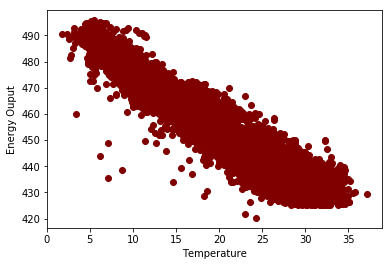

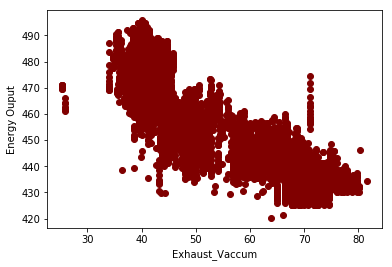

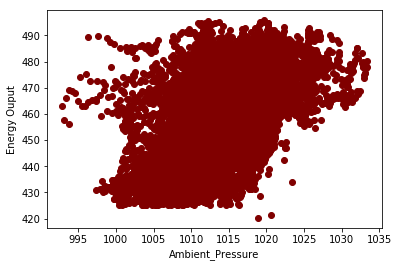

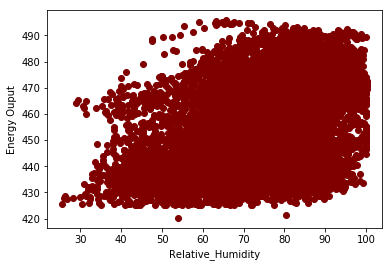

In [79]:
# Plotting the columns against the Energy Output.

for col in data.columns[:len(data.columns)-1]:
    plt.scatter(data[col], data["Energy_Output"], color="maroon")
    plt.ylabel("Energy Ouput")
    plt.xlabel(col)
    plt.show()

#### We can see that the least related column is Relative Humidity, but it still is not completely unrelated so as to exclude it from the model.

# B. Fitting Our Model and Predicting Models

In [56]:
# Randomizing the rows.

X = np.random.permutation(data.index)
data = data.reindex(X)

#### Creating test and train dataframes

In [57]:
import numpy as np

A = int(len(data)*0.8)

test = data[:A]
train = data[A:]

#### Fitting out model on training data and making training predictions

In [85]:
cols = data.columns.drop("Energy_Output")

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(train[cols], train["Energy_Output"])

predictions_train = reg.predict(train[cols])

rmse = (np.mean((predictions_train - train["Energy_Output"])**2))**0.5
rmse

4.5485688525881

#### Making Test Predictions

In [86]:
predictions_test = reg.predict(test[cols])

rmse = (np.mean((predictions_test - test["Energy_Output"])**2))**0.5
rmse

4.563798772581805

### Comparing train and test rmse shows that our model is not overfitting.
#### This is because of a dataset with columns that are nicely co-related with the target column and a moderate number of columns.

In [87]:
# Making Test Predictions

predictions_test

array([463.71536993, 434.68610798, 440.94022642, ..., 481.43648473,
       463.13866189, 446.35940451])

# C. Reducing Error by Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[cols], train["Energy_Output"])

predictions_DT = reg.predict(test[cols])

rmse_DT = (np.mean(predictions_DT - test["Energy_Output"])**2)**0.5
rmse_DT

0.02352277676160603

#### This shows that Decision Tree Regressor reduces our error greatly.

#### Making Predictions.

In [64]:
predictions_DT

array([461.865     , 427.61333333, 439.825     , ..., 484.46333333,
       461.805     , 447.015     ])

## Thus, above are the predictions for Energy Output for test dataframe.